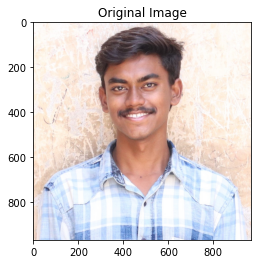

<class 'numpy.ndarray'>


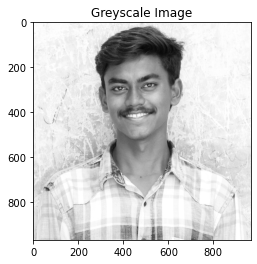

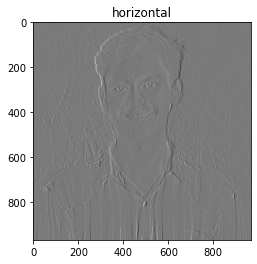

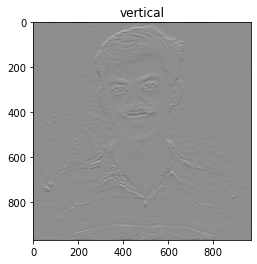

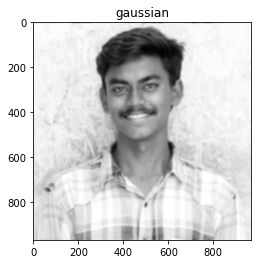

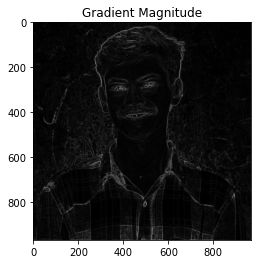

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

#defining gaussian kernal
def get_gauss_kernel(size=3,sigma=1):
    center=(int)(size/2)
    kernal=np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            diff=np.sqrt((i-center)**2+(j-center)**2)
            coef = 1 / (2.0 * np.pi * sigma**2)
            kernal[i,j]=coef*np.exp(-(diff**2)/(2*sigma**2))
    return kernal/np.sum(kernal)


#showing imported image
im_array = np.asarray(Image.open('image.jpg'))
plt.imshow(im_array)
plt.title("Original Image")
plt.show()

#reading image and converting into numpy array and greyscale image
im = np.array(Image.open('image.jpg').convert('L'))
print(type(im))
# Image.open('image.jpg').convert('L').save('greyscale.png')
# plt.imshow(np.array(Image.open('greyscale.png')))
# plt.show()

#saving the greyscale
gr_im = Image.fromarray(im).save('grey_image.png')

#showing greyscale image
grey_im_array = np.asarray(Image.open('grey_image.png'))
plt.imshow(grey_im_array, cmap = plt.get_cmap('gray'))
plt.title("Greyscale Image")
plt.show()

#showing gaussian kernal
# plt.imshow(get_gauss_kernel(3,1))
# print(get_gauss_kernel(3,1))

#applying selected filter
def blur(image, kernal):
    arraylist = []
#     print(image,kernal)
    for y in range(kernal.shape[1]):
        temparray = np.copy(image)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(kernal.shape[0]):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernal[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist_sum = np.sum(arraylist, axis=0)
    return arraylist_sum

#driver code
#constructing x-axis kernel
horizontal = np.array(([-1, 0, 1],[-2, 0, 2],[-1, 0, 1]), dtype="float")
#constructing y-axis kernel
vertical = np.array(([-1, -2, -1],[0, 0, 0],[1, 2, 1]), dtype="float")
#constructing gaussian kernal for size=10 and sigma=10
gaussian = get_gauss_kernel(10,10)

#applying and displaying outputs of kernals
kernals = (("horizontal", horizontal),("vertical", vertical),("gaussian", gaussian))
for (kernalName, kernal) in kernals:
    # print("After applying {} kernel".format(kernalName))
    plt.title("{}".format(kernalName))
    plt.imshow(blur(im, kernal), cmap = plt.get_cmap('gray'))
    plt.show()

#mixing both horizontal and vertical filters
gradient_magnitude = np.sqrt(np.square(blur(im, horizontal)) + np.square(blur(im, vertical)))
gradient_magnitude *= 255.0 / gradient_magnitude.max()
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.show()